# Plotting M/sigma over redshift for fixed mass

In [1]:
import sys
sys.path.append('/home/yja6qa/arepo_package/')

import arepo_package
import scipy.interpolate
import h5py
import os
import numpy as np
import plotting
from brahma_analysis import *
from sklearn.linear_model import LinearRegression

%matplotlib inline

h = 0.6774
radiative_efficiency=0.2

In [2]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
bFOFz1=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z1')
bFOFz2=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z2')
bFOFz3=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z3')
bFOFz4=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z4')
bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
bFOFz6=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z6')
bFOFz7=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z7')

LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
LW10z1=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z1')
LW10z2=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z2')
LW10z3=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z3')
LW10z4=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z4')
LW10z5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
LW10z6=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z6')
LW10z7=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z7')

spinz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
spinz1=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z1')
spinz2=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z2')
spinz3=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z3')
spinz4=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z4')
spinz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
spinz6=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z6')
spinz7=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z7')

richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')
richz1=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z1')
richz2=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z2')
richz3=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z3')
richz4=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z4')
richz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')
richz6=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z6')
richz7=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z7')

# Illustris and TNG 
Illz0=ReadBrahmaData('Brahma_Data/Illustris_z0')
TNGz0=ReadBrahmaData('Brahma_Data/TNG_z0')

Illz5=ReadBrahmaData('Brahma_Data/Illustris_z5')
TNGz5=ReadBrahmaData('Brahma_Data/TNG_z5')

# $M_{BH}$ at fixed $\sigma$ vs. redshift

In [3]:
# Scale factor to convert to peculiar velocities
a = np.array([1/(1+z) for z in np.arange(0,8,1)]) # For redshift z=0 to z=7

# Storing the x sigma's
Sigma_bFOFz0 = np.array(bFOFz0[5])[:,0]*a[0]
Sigma_bFOFz1 = np.array(bFOFz1[5])[:,0]*a[1]
Sigma_bFOFz2 = np.array(bFOFz2[5])[:,0]*a[2]
Sigma_bFOFz3 = np.array(bFOFz3[5])[:,0]*a[3]
Sigma_bFOFz4 = np.array(bFOFz4[5])[:,0]*a[4]
Sigma_bFOFz5 = np.array(bFOFz5[5])[:,0]*a[5]
Sigma_bFOFz6 = np.array(bFOFz6[5])[:,0]*a[6]
Sigma_bFOFz7 = np.array(bFOFz7[5])[:,0]*a[7]

Sigma_LW10z0 = np.array(LW10z0[5])[:,0]*a[0]
Sigma_LW10z1 = np.array(LW10z1[5])[:,0]*a[1]
Sigma_LW10z2 = np.array(LW10z2[5])[:,0]*a[2]
Sigma_LW10z3 = np.array(LW10z3[5])[:,0]*a[3]
Sigma_LW10z4 = np.array(LW10z4[5])[:,0]*a[4]
Sigma_LW10z5 = np.array(LW10z5[5])[:,0]*a[5]
Sigma_LW10z6 = np.array(LW10z6[5])[:,0]*a[6]
Sigma_LW10z7 = np.array(LW10z7[5])[:,0]*a[7]

Sigma_spinz0 = np.array(spinz0[5])[:,0]*a[0]
Sigma_spinz1 = np.array(spinz1[5])[:,0]*a[1]
Sigma_spinz2 = np.array(spinz2[5])[:,0]*a[2]
Sigma_spinz3 = np.array(spinz3[5])[:,0]*a[3]
Sigma_spinz4 = np.array(spinz4[5])[:,0]*a[4]
Sigma_spinz5 = np.array(spinz5[5])[:,0]*a[5]
Sigma_spinz6 = np.array(spinz6[5])[:,0]*a[6]
Sigma_spinz7 = np.array(spinz7[5])[:,0]*a[7]

Sigma_richz0 = np.array(richz0[5])[:,0]*a[0]
Sigma_richz1 = np.array(richz1[5])[:,0]*a[1]
Sigma_richz2 = np.array(richz2[5])[:,0]*a[2]
Sigma_richz3 = np.array(richz3[5])[:,0]*a[3]
Sigma_richz4 = np.array(richz4[5])[:,0]*a[4]
Sigma_richz5 = np.array(richz5[5])[:,0]*a[5]
Sigma_richz6 = np.array(richz6[5])[:,0]*a[6]
Sigma_richz7 = np.array(richz7[5])[:,0]*a[7]

In [19]:
sigmas = [10,10**1.5,100]
bin_width = 5

bFOF_sigmas = [Sigma_bFOFz0,Sigma_bFOFz1,Sigma_bFOFz2,Sigma_bFOFz3,Sigma_bFOFz4,Sigma_bFOFz5,Sigma_bFOFz6,Sigma_bFOFz7]
masses = [bFOFz0[0],bFOFz1[0],bFOFz2[0],bFOFz3[0],bFOFz4[0],bFOFz5[0],bFOFz6[0],bFOFz7[0]]

avgs = []
stds = []

for i in range(len(sigmas)):
    
    sigma_avgs = []
    sigma_stds = []
    
    for ii in range(8):

        index = np.logical_and(bFOF_sigmas[ii] > sigmas[i]-bin_width,bFOF_sigmas[ii] < sigmas[i]+bin_width)
        avg = np.mean(np.array(masses[ii])[index])
        std = np.std(np.array(masses[ii])[index])

        sigma_avgs.append(avg)
        sigma_stds.append(std)
        
    avgs.append(sigma_avgs)
    stds.append(sigma_stds)

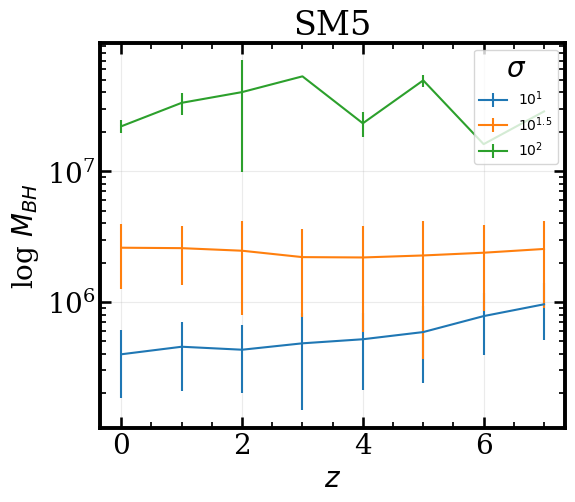

In [36]:
redshifts=[0,1,2,3,4,5,6,7]
labels = ['$10^1$','$10^{1.5}$','$10^2$']

plt.figure(figsize = (6,5))

for i in range(3):
    plt.errorbar(redshifts,avgs[i],stds[i],label=labels[i])
 
plt.legend(title='$\sigma$',fontsize=10,loc=1)
plt.yscale('log')
plt.ylabel('log $M_{BH}$')
plt.xlabel('$z$')
plt.title('SM5')
plt.grid(alpha=0.25)
plt.savefig('Plots/SM5_fixed_sigma.pdf')

 Testing fixed_x function:

In [4]:
sigmas = [10,10**1.5,100]
bin_width = 5

bFOF_sigmas = [Sigma_bFOFz0,Sigma_bFOFz1,Sigma_bFOFz2,Sigma_bFOFz3,Sigma_bFOFz4,Sigma_bFOFz5,Sigma_bFOFz6,Sigma_bFOFz7]
bFOF_masses = [bFOFz0[0],bFOFz1[0],bFOFz2[0],bFOFz3[0],bFOFz4[0],bFOFz5[0],bFOFz6[0],bFOFz7[0]]

avgs,stds = fixed_x(bFOF_sigmas,bFOF_masses,sigmas,bin_width)


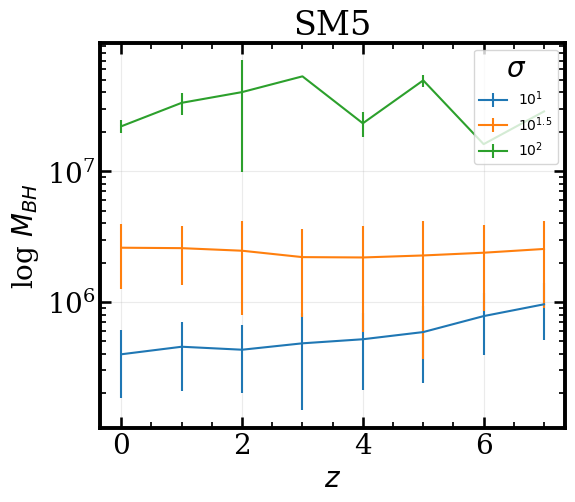

In [5]:
redshifts=[0,1,2,3,4,5,6,7]
labels = ['$10^1$','$10^{1.5}$','$10^2$']

plt.figure(figsize = (6,5))

for i in range(3):
    plt.errorbar(redshifts,avgs[i],stds[i],label=labels[i])
 
plt.legend(title='$\sigma$',fontsize=10,loc=1)
plt.yscale('log')
plt.ylabel('log $M_{BH}$')
plt.xlabel('$z$')
plt.title('SM5')
plt.grid(alpha=0.25)
plt.savefig('Plots/SM5_fixed_sigma.pdf')

Now for all boxes:

In [6]:
sigmas = [10,10**1.5,100]
bin_width = 5

bFOF_sigmas = [Sigma_bFOFz0,Sigma_bFOFz1,Sigma_bFOFz2,Sigma_bFOFz3,Sigma_bFOFz4,Sigma_bFOFz5,Sigma_bFOFz6,Sigma_bFOFz7]
bFOF_masses = [bFOFz0[0],bFOFz1[0],bFOFz2[0],bFOFz3[0],bFOFz4[0],bFOFz5[0],bFOFz6[0],bFOFz7[0]]

LW10_sigmas = [Sigma_LW10z0,Sigma_LW10z1,Sigma_LW10z2,Sigma_LW10z3,Sigma_LW10z4,Sigma_LW10z5,Sigma_LW10z6,Sigma_LW10z7]
LW10_masses = [LW10z0[0],LW10z1[0],LW10z2[0],LW10z3[0],LW10z4[0],LW10z5[0],LW10z6[0],LW10z7[0]]

spin_sigmas = [Sigma_spinz0,Sigma_spinz1,Sigma_spinz2,Sigma_spinz3,Sigma_spinz4,Sigma_spinz5,Sigma_spinz6,Sigma_spinz7]
spin_masses = [spinz0[0],spinz1[0],spinz2[0],spinz3[0],spinz4[0],spinz5[0],spinz6[0],spinz7[0]]

rich_sigmas = [Sigma_richz0,Sigma_richz1,Sigma_richz2,Sigma_richz3,Sigma_richz4,Sigma_richz5,Sigma_richz6,Sigma_richz7]
rich_masses = [richz0[0],richz1[0],richz2[0],richz3[0],richz4[0],richz5[0],richz6[0],richz7[0]]

bFOFavgs,bFOFstds = fixed_x(bFOF_sigmas,bFOF_masses,sigmas,bin_width)
LW10avgs,LW10stds = fixed_x(LW10_sigmas,LW10_masses,sigmas,bin_width)
spinavgs,spinstds = fixed_x(spin_sigmas,spin_masses,sigmas,bin_width)
richavgs,richstds = fixed_x(rich_sigmas,rich_masses,sigmas,bin_width)

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in s

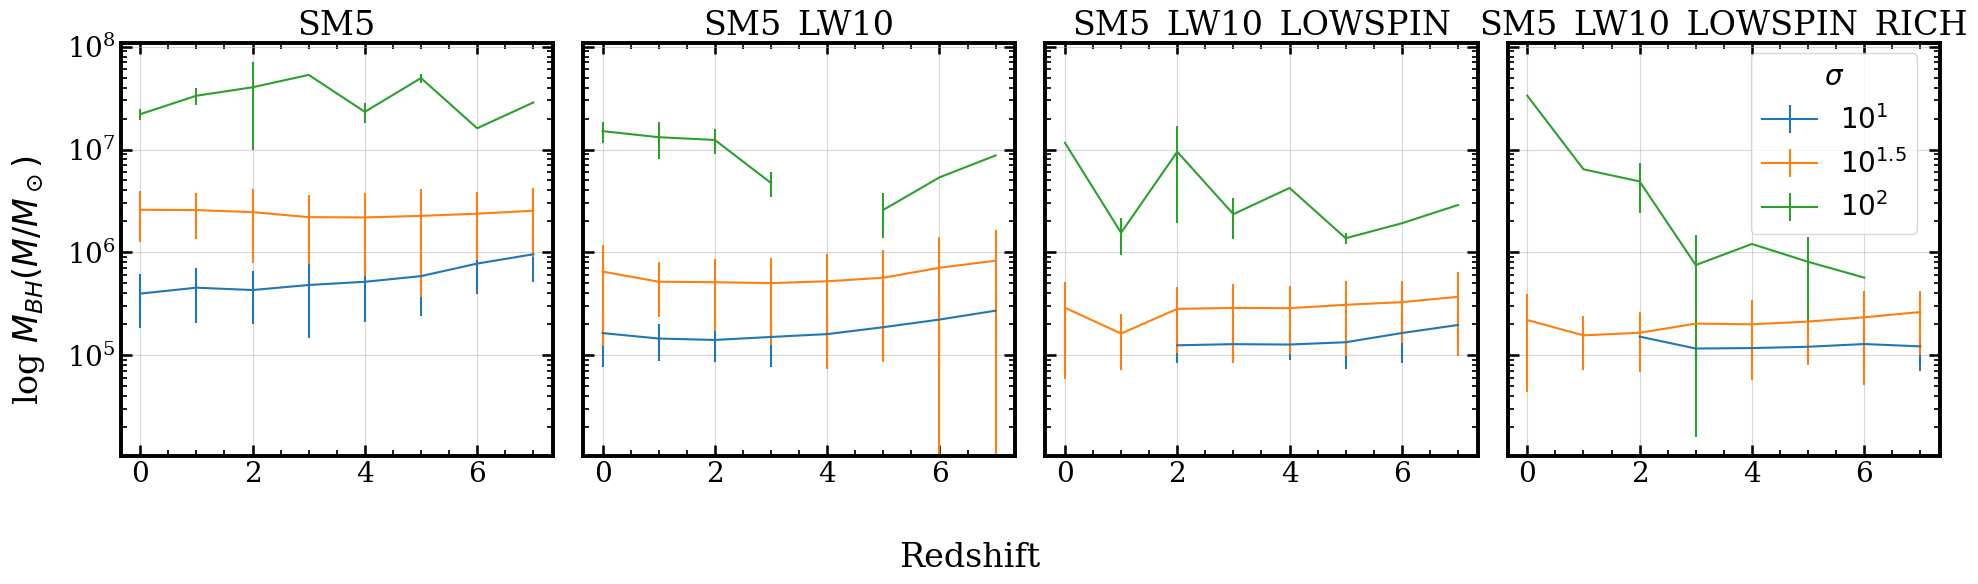

In [37]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']

fig,axs = plt.subplots(1,4,figsize = (20,6),sharey=True)

for i in range(len(sigmas)):
    if i == 0:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '$10^1$')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 1:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '$10^{1.5}$')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 2:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '$10^{2}$')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_yscale('log')
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)

fig.supxlabel('Redshift')
fig.supylabel('log $M_{BH} (M/M_\odot)$')
fig.legend(title = '$\sigma$',loc = (0.885,0.6),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/M_Sigma_fixed_sigma.pdf')